                                           Магазин "Стримчик"   
# Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.   
# Представлены данные до 2016 года. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
# В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». 
## Данные:   
- Name — название игры  
- Platform — платформа  
- Year_of_Release — год выпуска   
- Genre — жанр игры  
- NA_sales — продажи в Северной Америке (миллионы проданных копий)  
- EU_sales — продажи в Европе (миллионы проданных копий)  
- JP_sales — продажи в Японии (миллионы проданных копий)  
- Other_sales — продажи в других странах (миллионы проданных копий)  
- Critic_Score — оценка критиков (максимум 100)  
- User_Score — оценка пользователей (максимум 10)  
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 
  
## Задачи:
  
- Cколько игр выпускалось в разные годы.  
- Определить как менялись продажи по платформам.   
- Определить какие платформы лидируют по продажам, растут или падают.  
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.     
- Определить как влиют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Необходимо построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.  
  
  Необходимо проверьте гипотезы:  
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные  

**1.Анализ и обработка первичных данных**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.columns = data.columns.str.lower()

In [5]:
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Переименовали название столбцов под правила "хорошего" тона

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Первичный анализ показывает, что в Датафрейм 16715 строк и 11 колонок  
в столбце name два пропущенных значения  
в столбце year_of_release 269 пропущенных значений  
в столбце critic_score 8578 пропущенных значений  
в столбце user_score 6701 пропущенных значений  
в столбце rating 6766 пропущенных значений  
устроним пропуски в стобцах, где это возможно сделать  
Также необхолдимо поменять типы данных у стобцов: year_of_release,user_score.  

In [8]:
data['name'] = data['name'].fillna(0)
data['genre'] = data['genre'].fillna(0)
display(data[data['name'] == 0])


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,0,GEN,1993.0,0,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,0,GEN,1993.0,0,0.00,0.00,0.03,0.00,NaN,NaN,NaN


заполнили два пропущенных значения 0 в столбце name и genre. это оказались одни и теже строки в двух столбцах
удалим эти две строки из датафрейм

In [9]:
data = data.drop([659,14244])

Удалили лишнее две строки.Далее заполним  строки в столбце  year_of_release

In [10]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Заполним  пропущенные года медианным значением (так как разброс большой) и посмотрим что содержится в этих строках

In [11]:
data['year_of_release'] = data['year_of_release'].fillna(data['year_of_release'].median())
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

выравняли года, чтобы не было скачков

In [12]:
data['year_of_release'] = data['year_of_release'].astype(int)


перевели year_of_release в формат целых чисел для дальней работы с ними

In [13]:
data[data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2007,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


в столбце user_score 2424 строки с признаком tbd. Это означает что игра еще не вышла и ее не оценили, но при этом критики уже поставили свою оценку  
Данное количество строк большее и удалять мы их не будем,поставим вместо tdd -0 и преобразуем все строки в формат float и 


In [14]:
data['user_score'] = data['user_score'].replace('tbd',0)
data['user_score'] = pd.to_numeric(data['user_score'],errors='raise').round(1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
data['rating'] = data['rating'].replace('K-A','E')
data['rating'] = data['rating'].fillna('no-rating')
data['rating'].value_counts()

no-rating    6764
E            3993
T            2961
M            1563
E10+         1420
EC              8
RP              3
AO              1
Name: rating, dtype: int64

**Пропуски в столбце rating решено выделить в отдельную группу 'no-rating'**
Данные пропуски связаны скорее всего с тем,что ESRB начали  свою деятельность только в 1994 году.

In [16]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']+ data['other_sales']
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no-rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no-rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no-rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no-rating,28.31


Посчитали суммарные продажи во всех регионах и записали их в  столбец total_sales

Выводы:   
В Датафрейм 16715 строк и 11 колонок. 
в столбце name два пропущенных значения  
в столбце year_of_release обработано 269  значений и проставили медианное значение вместо пропусков   
в столбце rating 6766 пропущенных значений. Выделили их в отдельную группу 'no-rating'.ESRB начали свою деятельность в 1994 году.  
Поменяли типы данных у стобцов: year_of_release,user_score.
Удалили лишнее две строки в столбце name и genre
В столбце user_score 2424 строки с признаком tbd. Это означает что игра еще не вышла и ее не оценили. 
Данное количество строк большое и удалять мы их не стали,поставили вместо tdd -0 и преобразовали все строки в формат float   
Посчитали суммарные продажи во всех регионах и записали их в  столбец total_sales  

**2.Исследовательский анализ данных**

In [17]:
data_game = data.pivot_table(index='year_of_release',values ='genre', aggfunc = 'count')

<AxesSubplot:title={'center':'динамика по годам(кол-во игр)'}, xlabel='год', ylabel='количество игр'>

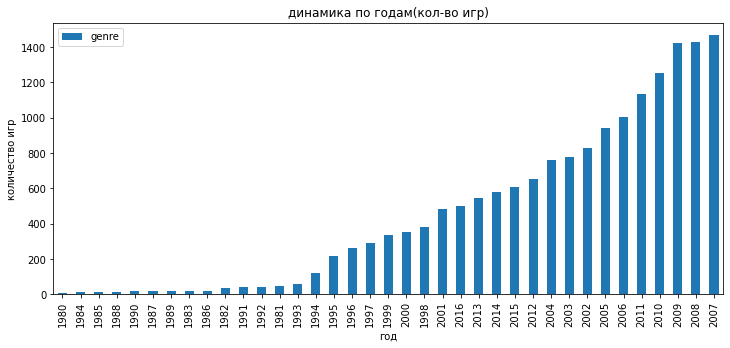

In [18]:
plt.rcParams['figure.figsize'] = [12,5]
display(data_game.sort_values(by = 'genre',ascending = True).plot(kind='bar',title='динамика по годам(кол-во игр)',xlabel='год',ylabel='количество игр'));

Как видно по динамики 2007-2011 гг. выпускалось наибольшее количество игр  
С 1980 года динамика была однородная и шла по возростанию, но в 1994 году наблюдается резкий скачок(напомним,что ERSB начала свою деятельность в 1994 году)
до 2011 г. шел рост, но затем все пошло на спад

Можно пренебречь данными до 1994 года

In [19]:
date_platform = data.pivot_table(index = 'platform',
                                 values = 'total_sales', 
                                 aggfunc = 'sum')
date_platform.columns = ['Продажи']
display(date_platform.sort_values(by='Продажи',ascending = False).head())

,Продажи
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


Наиболее популярные платформы это: PS2,X360,PS3,Wii и Ds
Посстроим по ним графики по годам

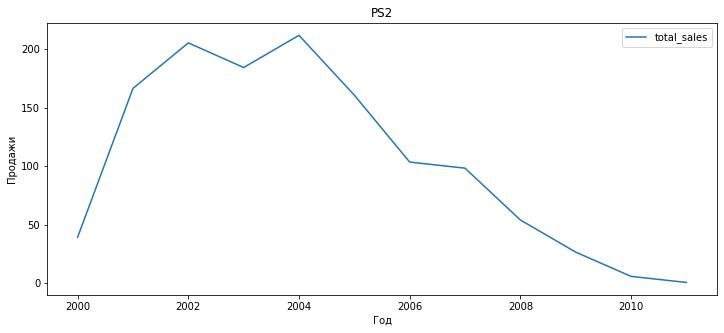

In [20]:
ps_2=data.query('platform == "PS2"').pivot_table(index='year_of_release',values = 'total_sales',aggfunc ='sum')
ps_2.plot()
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('PS2')
plt.show();

Наблюдается падение после 2004 года(5-й год)

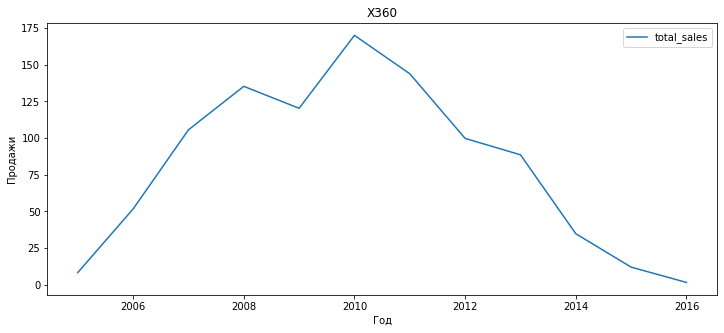

In [21]:
X_360=data.query('platform == "X360"').pivot_table(index='year_of_release',values = 'total_sales',aggfunc ='sum')
X_360.plot()
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('X360')
plt.show();

Наблюдается падение после 2010 года(5-й год)

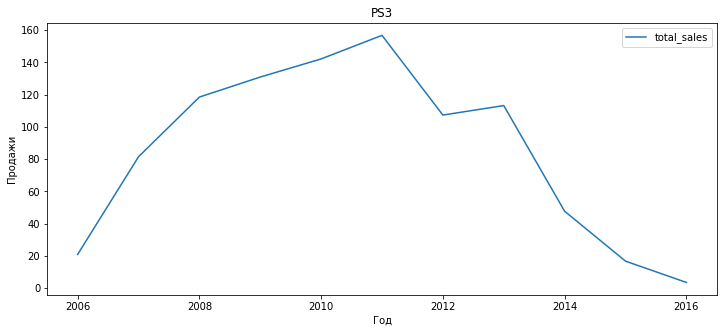

In [22]:
ps_3=data.query('platform == "PS3"').pivot_table(index='year_of_release',values = 'total_sales',aggfunc ='sum')
ps_3.plot()
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('PS3')
plt.show();

Наблюдается падение после 2010 года(5-й год)

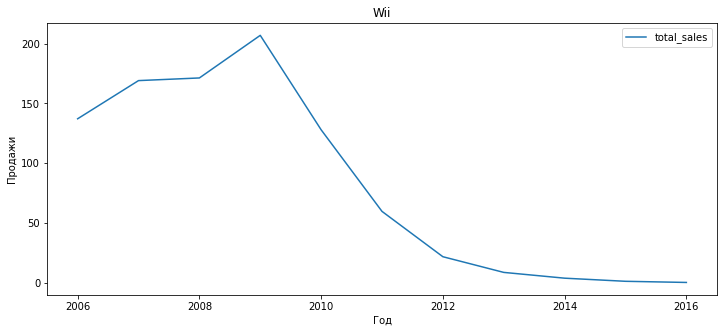

In [23]:
wii=data.query('platform == "Wii"').pivot_table(index='year_of_release',values = 'total_sales',aggfunc ='sum')
wii.plot()
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Wii')
plt.show();

Наблюдается падение после 2009 года(4-й год)

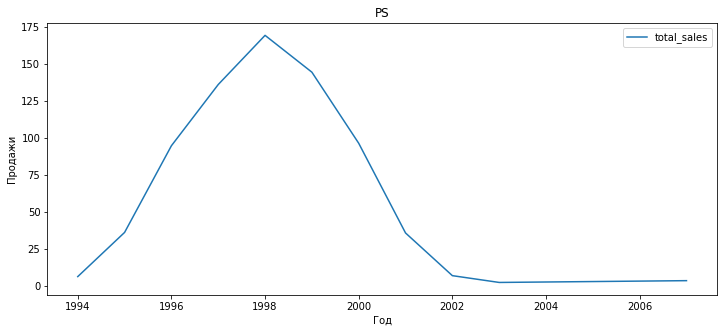

In [24]:
ps=data.query('platform == "PS"').pivot_table(index='year_of_release',values = 'total_sales',aggfunc ='sum')
ps.plot()
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('PS')
plt.show();

Наблюдается падение после 1998 года(5-й год)

У платформ наблюдается одинаковая динамика
в начале идет рост и затем падение(после 5 лет работы)
в среднем платформы работают 10 лет
На примере PS и их трех поколений платформ можно сделать вывод, что новые платформы появляются через 5 лет, как раз как идет спад в продажах


In [25]:
data_year = data.query('2013<=year_of_release <=2016')

display(data_year)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no-rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no-rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no-rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no-rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no-rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no-rating,0.01


Анализ данных показал что действующий рабочий цикл (подъем-спад) это около 10 лет при этом каждые 5 лет появляются новые платформы и идет спад у старых платформ, то берем период с 2013-2016 гг. Это составляет рабочий датафрейм data_year из 2233 строк

In [26]:
data_platform_year = data_year.pivot_table(index = 'platform',
                                 values = 'total_sales', 
                                 aggfunc = 'sum')
data_platform_year.columns = ['Продажи']
display(data_platform_year.sort_values(by='Продажи',ascending = False).head())

,Продажи
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


За последние 5 лет наиболее стабильные и набирающие обороты платформы: PS3,X360,PS4,3DS и XOne
Далее проверим их динамику

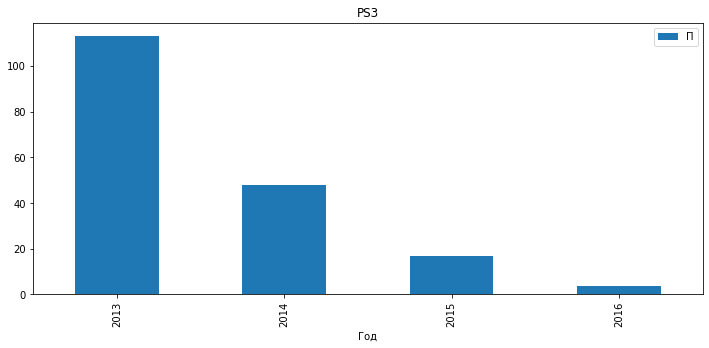

In [27]:
ps_3_new = data_year.query('platform == "PS3"').pivot_table(index='year_of_release',
                                                            values = 'total_sales',aggfunc ='sum')
ps_3_new.plot(kind='bar')
plt.xlabel('Год')
plt.legend('Продажи')
plt.title('PS3')
plt.show();

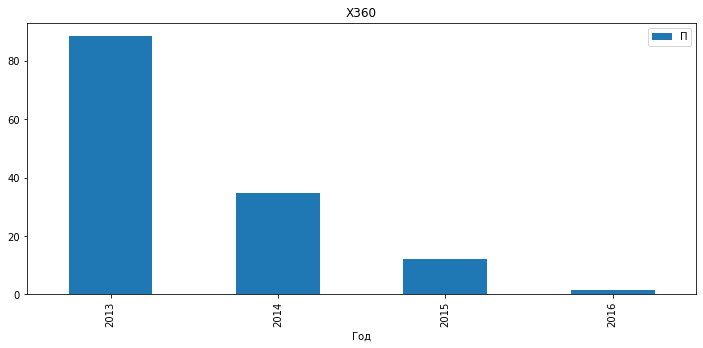

In [28]:
x_360_new =data_year.query('platform == "X360"').pivot_table(index='year_of_release',
                                                             values = 'total_sales',aggfunc ='sum')
x_360_new.plot(kind='bar');
plt.xlabel('Год')
plt.legend('Продажи')
plt.title('X360')
plt.show();

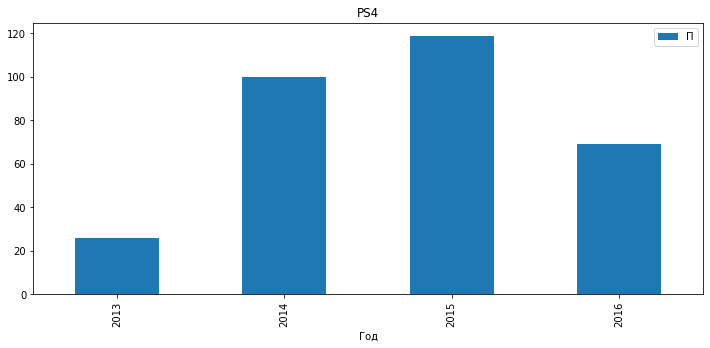

In [29]:
ps_4_new =data_year.query('platform == "PS4"').pivot_table(index='year_of_release',values = 'total_sales',aggfunc ='sum')
ps_4_new.plot(kind='bar');
plt.xlabel('Год')
plt.legend('Продажи')
plt.title('PS4')
plt.show();

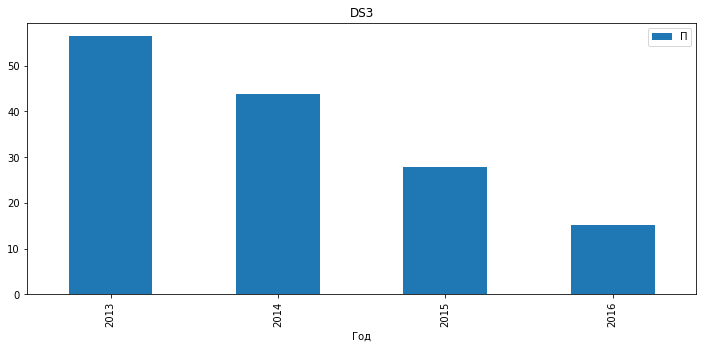

In [30]:
ds_3 = data_year.query('platform == "3DS"').pivot_table(index='year_of_release',
                                                        values = 'total_sales',aggfunc ='sum')
ds_3.plot(kind='bar');
plt.xlabel('Год')
plt.legend('Продажи')
plt.title('DS3')
plt.show();

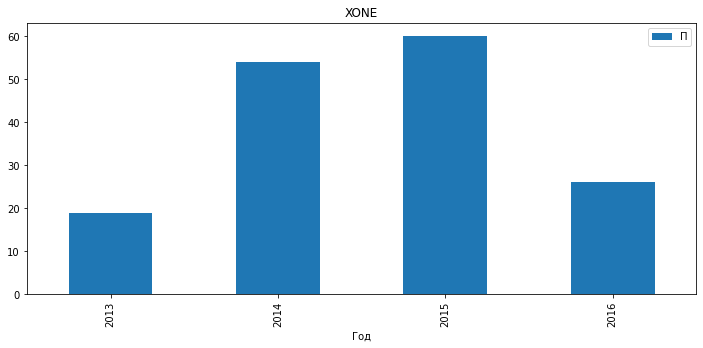

In [31]:
xone = data_year.query('platform == "XOne"').pivot_table(index='year_of_release',
                                                         values = 'total_sales',aggfunc ='sum')
xone.plot(kind='bar');
plt.xlabel('Год')
plt.legend('Продажи')
plt.title('XONE')
plt.show();

Как видно на графиках платформы PS3, 3DS,X360 падают по продажам,хоть при этом еще лидеры по продажам. Они НЕ  являются перспективными и на них не стоит делать ставки по продвижению.     
Стоит обратить внимание на платформы XOne и PS4 они уже в топе по продажам и при этом только набирают рост


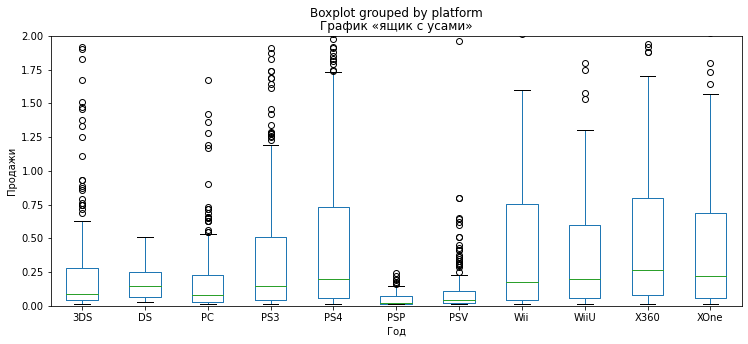

In [32]:
data_boxplt = data_year.boxplot(column = ['total_sales'],by = 'platform',grid= False)
plt.ylim([0,2])
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('График «ящик с усами»')
plt.show();

У всех платформ медиана незначительно выше 0, следовательно половина всех значений очень низкие(что логично для триминговых платформ так как игры покупают физические лица по 1-2 игры в год с низкой стоимостью)
У всех платформ много выбросов, которые выходят за рамки высоты ящиков. Большой разброс говорит, о том что есть популярные игры на которые большой спрос и большие покупки у пользователей
Самые большие "Усы" у платформ: ps3,ps4,x360,XOne,wiiU,Wii это говорит что у этих платформ наибольшие продажи


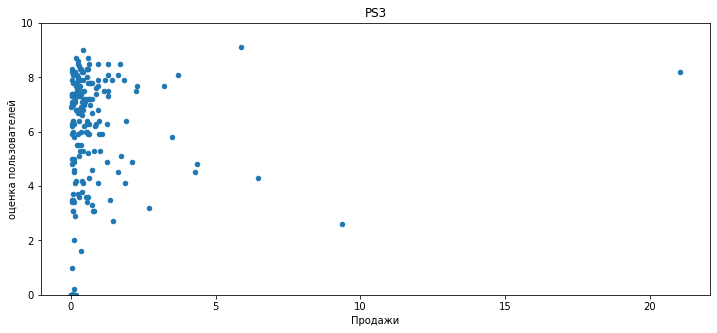

In [33]:
ps3_user_score = data_year.query('platform == "PS3"')
ps3_user_score.plot(x='total_sales', y ='user_score',kind='scatter')
plt.rcParams['figure.figsize'] = [12,5]
plt.xlabel('Продажи')
plt.ylabel('оценка пользователей')
plt.title('PS3')
plt.ylim([0,10])
plt.show();

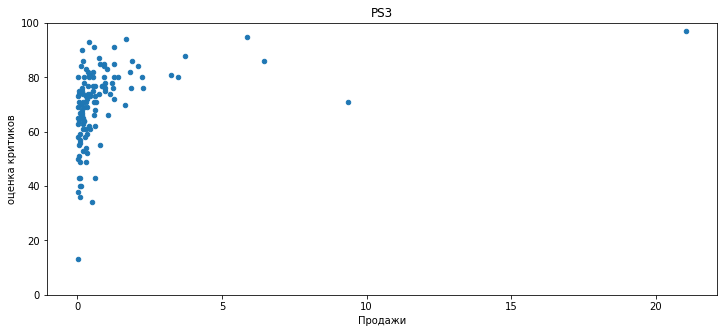

In [34]:
ps3_critic_score = data_year.query('platform == "PS3"')
ps3_critic_score.plot(x='total_sales', y ='critic_score',kind='scatter')

plt.xlabel('Продажи')
plt.ylabel('оценка критиков')
plt.title('PS3')
plt.ylim([0,100])
plt.show();

In [35]:
ps3_user_score['critic_score'].corr(ps3_user_score['total_sales'])

0.3342853393371919

In [36]:
ps3_user_score['user_score'].corr(ps3_user_score['total_sales'])

0.10342715912035182

Взяли популярную платформу PS3  
Построили диаграммму рассеяния 
Eсть слабая зависимость между отзывами критиков  и продажами. 
между отзовами пользователей и продажи связи практически нет
На диаграмме видно что отзыв большой,но продажи около 0

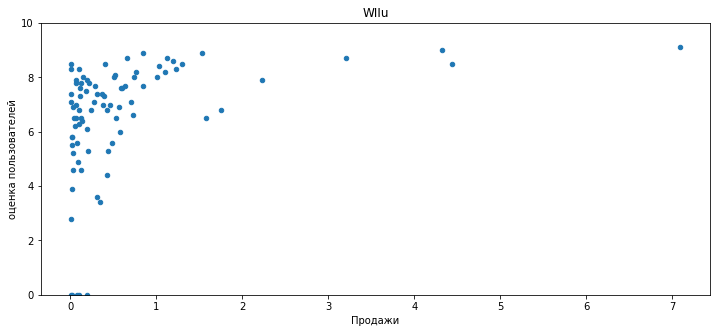

In [37]:
wiiu_user_score = data_year.query('platform == "WiiU"')
wiiu_user_score.plot(x='total_sales', y ='user_score',kind='scatter')
plt.rcParams['figure.figsize'] = [12,5]
plt.xlabel('Продажи')
plt.ylabel('оценка пользователей')
plt.title('WIIu')
plt.ylim([0,10])
plt.show();

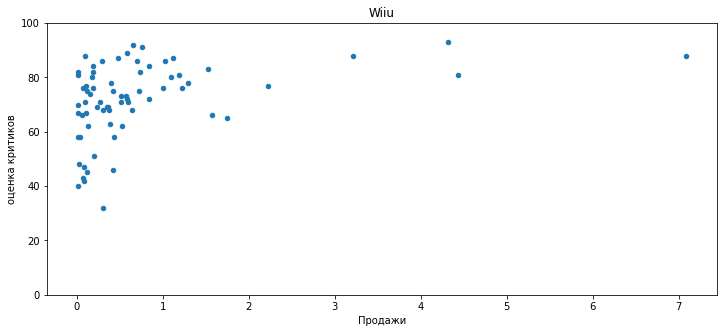

In [38]:
wiiu_critic_score = data_year.query('platform == "WiiU"')
wiiu_critic_score.plot(x='total_sales', y ='critic_score',kind='scatter')

plt.xlabel('Продажи')
plt.ylabel('оценка критиков')
plt.title('Wiiu')
plt.ylim([0,100])
plt.show();

In [39]:
wiiu_critic_score['critic_score'].corr(wiiu_critic_score['total_sales'])

0.3764149065423912

In [40]:
wiiu_critic_score['user_score'].corr(wiiu_critic_score['total_sales'])

0.36154784989659866

Взяли популярную платформу Wiiu  
Построили диаграммму рассеяния   
связь между продажами и отзовами есть и сильнее чем у платформы pss3, но при все равно слабая

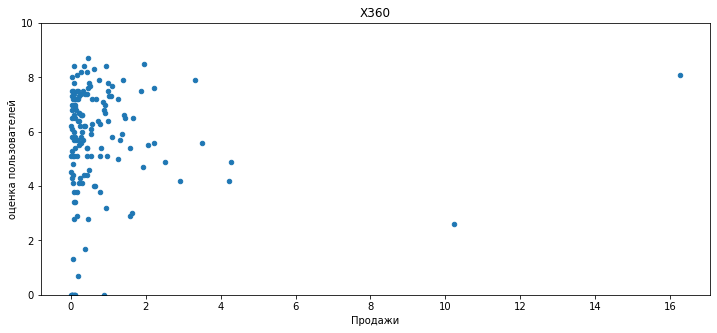

In [41]:
x360_user_score = data_year.query('platform == "X360"')
x360_user_score.plot(x='total_sales', y ='user_score',kind='scatter')
plt.rcParams['figure.figsize'] = [12,5]
plt.xlabel('Продажи')
plt.ylabel('оценка пользователей')
plt.title('X360')
plt.ylim([0,10])
plt.show();

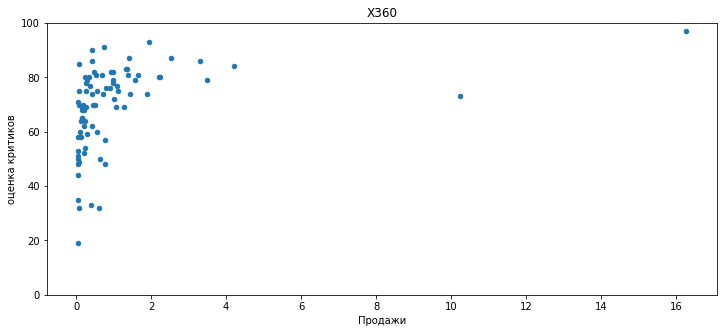

In [42]:
x360_critic_score = data_year.query('platform == "X360"')
x360_critic_score.plot(x='total_sales', y ='critic_score',kind='scatter')

plt.xlabel('Продажи')
plt.ylabel('оценка критиков')
plt.title('X360')
plt.ylim([0,100])
plt.show();

In [43]:
x360_critic_score['critic_score'].corr(x360_critic_score['total_sales'])

0.3503445460228664

In [44]:
x360_user_score['user_score'].corr(x360_user_score['total_sales'])

0.060448024354410566

Взяли популярную платформу x360  
Построили диаграммму рассеяния   
связь между оценками пользователей и продажами практически нет
связь между оценками критиков есть но в категории -'слабая'

In [45]:
data_year['critic_score'].corr(data_year['total_sales'])

0.3136995151027371

In [46]:
data_year['user_score'].corr(data_year['total_sales'])

0.09310898029039398

Связи между продажами и отзовами критиков слабая и на популярных платформах идут с коэфицентом 0.3.  
Связи между продажами и отзавами пользователей практически нет и это видно на всех популярных платформах,кроме wiiu,где прослежтивается слабая связь


In [47]:
data_genre = data_year.pivot_table(index='genre',values = 'total_sales',aggfunc =('sum','count','mean'))
data_genre.columns = ['количество игр','средние продажи','сумарные продажи']
display(data_genre.sort_values(by='количество игр',ascending =False))

,количество игр,средние продажи,сумарные продажи
genre,,,
Action,766,0.420196,321.87
Role-Playing,292,0.499623,145.89
Adventure,245,0.096490,23.64
Sports,214,0.703972,150.65
Shooter,187,1.245882,232.98
Misc,155,0.405290,62.82
Racing,85,0.469294,39.89
Fighting,80,0.441375,35.31
Platform,74,0.576081,42.63


In [48]:
data_genre['количество игр'].corr(data_genre['сумарные продажи'])

0.8416828492764133

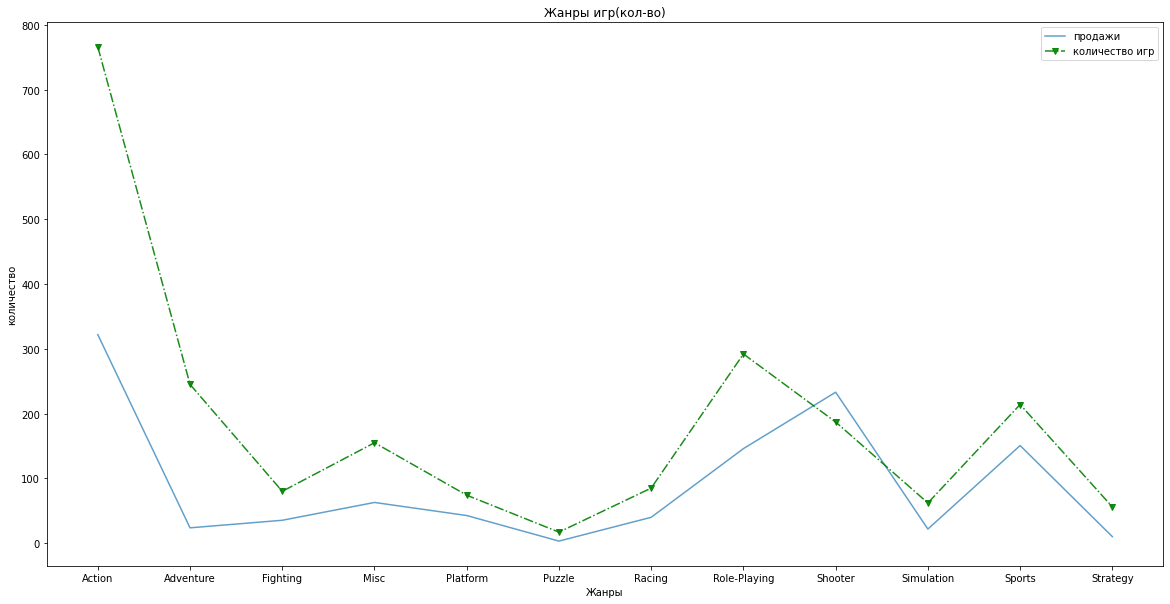

In [49]:
plt.rcParams['figure.figsize'] = [20,10]
plt.plot(data_genre['сумарные продажи'],'-',alpha=0.7,label='продажи')
plt.plot(data_genre['количество игр'],'v-.g',alpha=0.9,label='количество игр')
plt.legend()
plt.xlabel('Жанры')
plt.ylabel('количество')
plt.title('Жанры игр(кол-во)')
plt.show();

In [50]:
display(data_genre.sort_values(by='средние продажи',ascending =False))

,количество игр,средние продажи,сумарные продажи
genre,,,
Shooter,187,1.245882,232.98
Sports,214,0.703972,150.65
Platform,74,0.576081,42.63
Role-Playing,292,0.499623,145.89
Racing,85,0.469294,39.89
Fighting,80,0.441375,35.31
Action,766,0.420196,321.87
Misc,155,0.405290,62.82
Simulation,62,0.350968,21.76


Самый популярный жанр игр это 'Action', а самый непопулярный 'Puzzle'  
Определенно наблюдается взаимосвязь между количеством игр и продажами  
Наимболее прибыльный жанр  'Shooter' и 'Sports', а наименьшие 'Adventure'   
Выбивается только жанр 'Adventure', низкие продажи при больших количествах игр

**Выводы по разделу 2**
- В 1994 году наблюдается резкий скачок выпуска игр(напомним,что ERSB начала свою деятельность в 1994 году). С 2007-2011 гг. выпускалось наибольшее количество игр
- Наиболее популярные платформы это: PS2,X360,PS3,Wii,Wiiu и Ds  
- У платформ наблюдается одинаковая динамика в начале идет рост и затем падение(после 5 лет работы), в среднем платформы работают 10 лет  
- За последние 5 лет наиболее стабильные и набирающие обороты платформы: PS3,X360,PS4,3DS и XOne  
- Как видно на графиках платформы PS3, 3DS,X360 падают по продажам, при этом являются  лидерами по продажам. Они НЕ  являются перспективными и на них не стоит делать ставки по продвижению.Стоит обратить внимание на платформы XOne и PS4 они уже в топе по продажам и при этом только набирают рост   
- Зависимость между отзывами критиков и продажами слабая.
- Зависимость между отзывами пользователей и продажами отстуствует.
- Более сильная связь у продаж с отзовами критиков.   
- Самый популярный жанр игр это 'Action', а самый непопулярный 'Puzzle'. Наимболие прибыльный жанр игр 'Shooter' и 'Sports', а наименьший 'Adventure'. Определена зависимость между высококимм продажами и высоким количеством игр в жанре  

**3. Портрет пользователя каждого региона** 

Определим портрет для пользователя каждого региона (NA, EU, JP):  
- Самые популярные платформы (топ-5).     
- Самые популярные жанры (топ-5).    
- Ответим на вопрос - Влияет ли рейтинг ESRB на продажи в отдельном регионе?    


In [51]:
data_region_platform = data_year.pivot_table(index = 'platform',
                                        values = ('eu_sales','jp_sales','na_sales'),aggfunc = ['sum','count','mean'])
data_region_platform.columns = ['Европа(сумма)','Япония(сумма)','Северная Америка(сумма)',
                               'Европа(кол-во)','Япония(кол-во)','Северная Америка(кол-во)',
                                'Европа(доля)','Япония(доля)','Северная Америка(доля)']
display(data_region_platform)

,Европа(сумма),Япония(сумма),Северная Америка(сумма),Европа(кол-во),Япония(кол-во),Северная Америка(кол-во),Европа(доля),Япония(доля),Северная Америка(доля)
platform,,,,,,,,,
3DS,30.96,67.81,38.20,303,303,303,0.102178,0.223795,0.126073
DS,0.85,0.00,0.57,8,8,8,0.106250,0.000000,0.071250
PC,25.36,0.00,11.11,189,189,189,0.134180,0.000000,0.058783
PS3,67.81,23.35,63.50,345,345,345,0.196551,0.067681,0.184058
PS4,141.09,15.96,108.74,392,392,392,0.359923,0.040714,0.277398
PSP,0.17,3.29,0.00,67,67,67,0.002537,0.049104,0.000000
PSV,6.10,18.59,5.04,358,358,358,0.017039,0.051927,0.014078
Wii,5.93,0.05,6.56,23,23,23,0.257826,0.002174,0.285217
WiiU,19.85,10.88,29.21,115,115,115,0.172609,0.094609,0.254000


Далее определим доли и узнаем ТОП-5 самых популярных платформ в каждом регионе

In [52]:
display(data_region_platform['Европа(сумма)'].sort_values(ascending = False).head())

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: Европа(сумма), dtype: float64

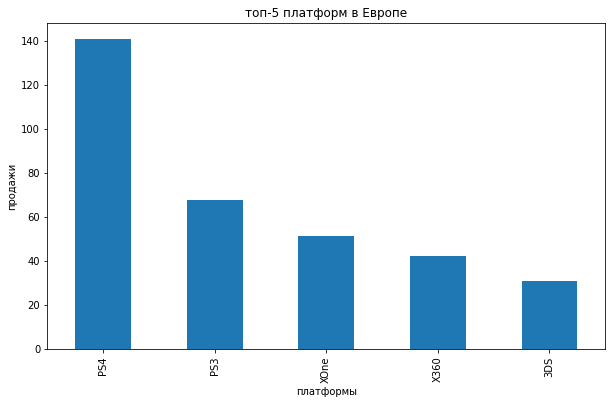

In [53]:
plt.rcParams['figure.figsize'] = [10,6]

data_region_platform['Европа(сумма)'].sort_values(ascending = False).head().plot(kind='bar')
plt.xlabel('платформы')
plt.ylabel('продажи')
plt.title('топ-5 платформ в Европе')
plt.show();

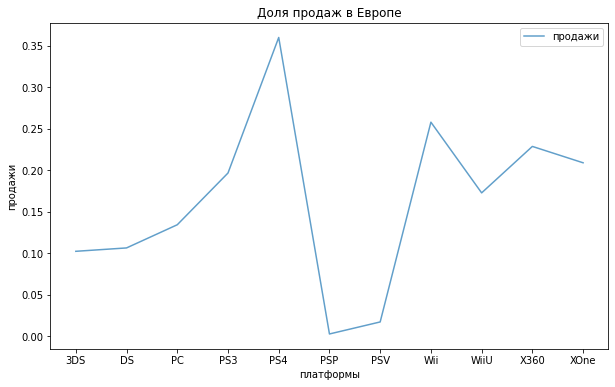

In [54]:

plt.plot(data_region_platform['Европа(доля)'],'-',alpha=0.7,label='продажи')
plt.legend()
plt.xlabel('платформы')
plt.ylabel('продажи')
plt.title('Доля продаж в Европе')
plt.show();

В Европе по прибыльности(доле) Wii и WiiU опережают XOne и X360, но при этом платформы XOne и X360 популярней

In [56]:
display(data_region_platform['Япония(сумма)'].sort_values(ascending = False).head())

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: Япония(сумма), dtype: float64

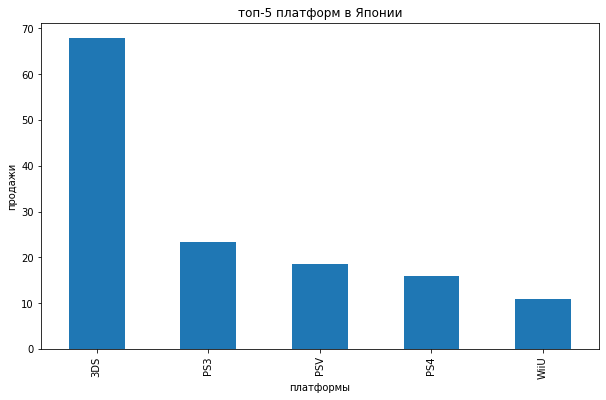

In [57]:
plt.rcParams['figure.figsize'] = [10,6]

data_region_platform['Япония(сумма)'].sort_values(ascending = False).head().plot(kind='bar')
plt.xlabel('платформы')
plt.ylabel('продажи')
plt.title('топ-5 платформ в Японии')
plt.show();

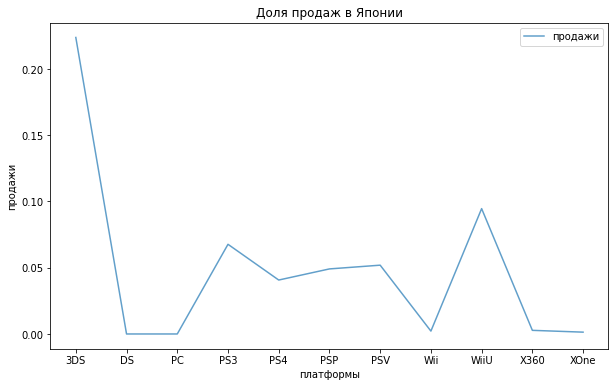

In [58]:
plt.plot(data_region_platform['Япония(доля)'],'-',alpha=0.7,label='продажи')
plt.legend()
plt.xlabel('платформы')
plt.ylabel('продажи')
plt.title('Доля продаж в Японии')
plt.show();

В Японии топ-5 платформ соответсвуют высоким прибыльностям(долям) этих же платформ

In [59]:
display(data_region_platform['Северная Америка(сумма)'].sort_values(ascending = False).head())

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: Северная Америка(сумма), dtype: float64

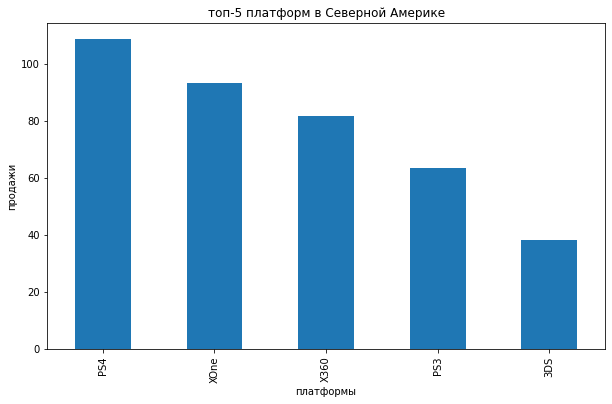

In [60]:
plt.rcParams['figure.figsize'] = [10,6]

data_region_platform['Северная Америка(сумма)'].sort_values(ascending = False).head().plot(kind='bar')
plt.xlabel('платформы')
plt.ylabel('продажи')
plt.title('топ-5 платформ в Северной Америке')
plt.show();

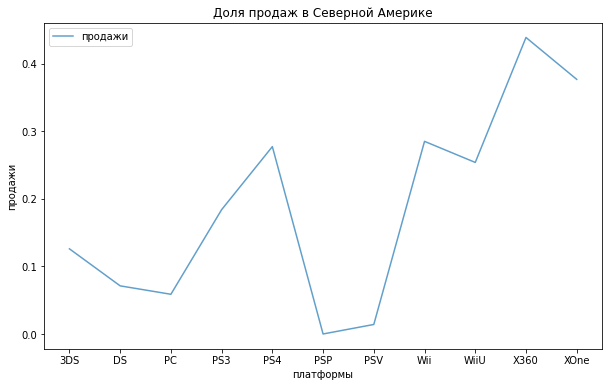

In [61]:
plt.plot(data_region_platform['Северная Америка(доля)'],'-',alpha=0.7,label='продажи')
plt.legend()
plt.xlabel('платформы')
plt.ylabel('продажи')
plt.title('Доля продаж в Северной Америке')
plt.show();

В Северной Америке по прибыльности(доле) Wii и WiiU опережают Ps3 и ps4, но при этом платформы Ps3 и ps4 популярней

In [62]:
total = data_region_platform['Европа(сумма)'].sum() + data_region_platform['Япония(сумма)'].sum() +data_region_platform['Северная Америка(сумма)'].sum()
print('в Европе доля всех продаж составляет', data_region_platform['Европа(сумма)'].sum()/total)
print('в Японии доля всех продаж составляет', data_region_platform['Япония(сумма)'].sum()/total)
print('в Северной Америке доля всех продаж составляет', data_region_platform['Северная Америка(сумма)'].sum()/total)

в Европе доля всех продаж составляет 0.40406090324707455
в Японии доля всех продаж составляет 0.14502637217735287
в Северной Америке доля всех продаж составляет 0.45091272457557263


Топ-5 игровых платформ в регионе - Европа:  

- PS4      
- PS3     
- XOne          
- X360  
- 3DS

Топ-5 игровых платформ в регионе - Япония:  
- 3DS
- PS3      
- PSV    
- PS4      
- wIIu 

Топ-5 игровых платформ в регионе - Северная Америка: 
- PS4     
- XOne     
- X360     
- PS3    
- 3DS 

Европа и Северная Америка выбирают одинаковые платформы и на их долю приходится основная часть продаж-85: (40% и 45 %). Япония выбирает немного другие  платформы  и на них приходится 15% всех продаж

In [63]:
data_region_genre = data_year.pivot_table(index = 'genre',
                                        values = ('eu_sales','jp_sales','na_sales'),aggfunc = ['sum','mean'])
data_region_genre.columns = ['Европа(сумма)','Япония(сумма)','Северная Америка(сумма)',
                               'Европа(доля)','Япония(доля)','Северная Америка(доля)']
display(data_region_genre)

,Европа(сумма),Япония(сумма),Северная Америка(сумма),Европа(доля),Япония(доля),Северная Америка(доля)
genre,,,,,,
Action,118.13,40.49,126.05,0.154217,0.052859,0.164556
Adventure,8.25,5.82,7.14,0.033673,0.023755,0.029143
Fighting,8.55,7.65,15.55,0.106875,0.095625,0.194375
Misc,20.04,9.20,27.49,0.129290,0.059355,0.177355
Platform,15.58,4.79,18.14,0.210541,0.064730,0.245135
Puzzle,1.00,1.18,0.83,0.058824,0.069412,0.048824
Racing,20.19,2.30,12.96,0.237529,0.027059,0.152471
Role-Playing,36.97,51.04,46.40,0.126610,0.174795,0.158904
Shooter,87.86,6.61,109.74,0.469840,0.035348,0.586845


In [64]:
display(data_region_genre['Европа(сумма)'].sort_values(ascending = False).head())

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: Европа(сумма), dtype: float64

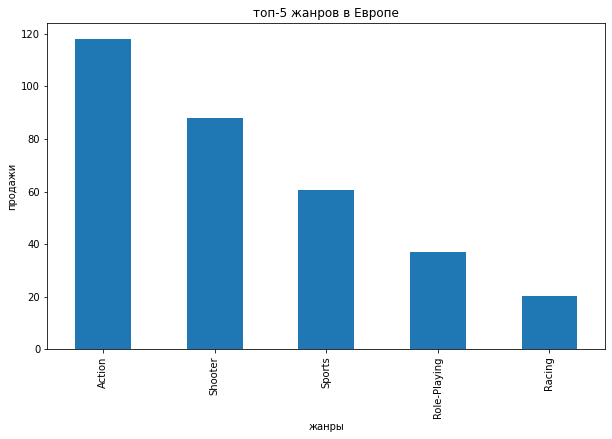

In [65]:
plt.rcParams['figure.figsize'] = [10,6]

data_region_genre['Европа(сумма)'].sort_values(ascending = False).head().plot(kind='bar')
plt.xlabel('жанры')
plt.ylabel('продажи')
plt.title('топ-5 жанров в Европе')
plt.show();

In [66]:
display(data_region_genre['Япония(сумма)'].sort_values(ascending = False).head())

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: Япония(сумма), dtype: float64

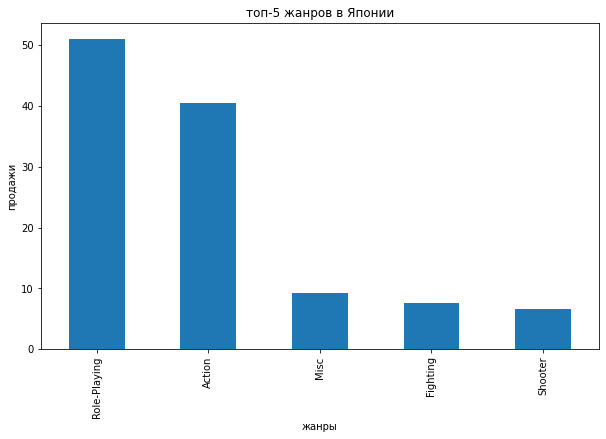

In [67]:
data_region_genre['Япония(сумма)'].sort_values(ascending = False).head().plot(kind='bar')
plt.xlabel('жанры')
plt.ylabel('продажи')
plt.title('топ-5 жанров в Японии')
plt.show();

In [68]:
display(data_region_genre['Северная Америка(сумма)'].sort_values(ascending = False).head())

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: Северная Америка(сумма), dtype: float64

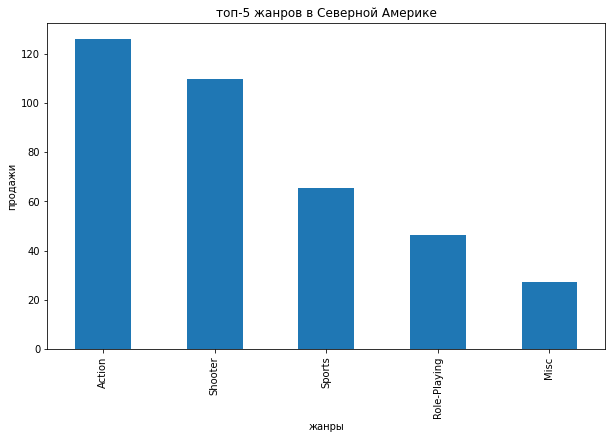

In [69]:
data_region_genre['Северная Америка(сумма)'].sort_values(ascending = False).head().plot(kind='bar')
plt.xlabel('жанры')
plt.ylabel('продажи')
plt.title('топ-5 жанров в Северной Америке')
plt.show();

Топ-5 игровых жанров в регионе - Европа:  

- Action      
- Shooter    
- Sports     
- Role-Playing     
- Racing  

Топ-5 игровых жанров в регионе - Япония:  
- Role-Playing
- Action      
- Misc    
- Fighting      
- Shooter   

Топ-5 игровых жанров в регионе - Северная Америка: 
- Action      
- Shooter    
- Sports     
- Role-Playing    
- Misc

В Европе и Северной Америке схожи вкусы на игровые жанры, они любители активных игр и более командных игр  
В Японии преобладают более спокойные,тщательные игры, где на первую роль выходит интелектуальные способности игкрока.

In [70]:
data_region_rating = data_year.pivot_table(index = 'rating',
                                        values = ('eu_sales','jp_sales','na_sales'),aggfunc = 'sum')
data_region_rating.columns = ['Европа(сумма)','Япония(сумма)','Северная Америка(сумма)']
display(data_region_rating)

,Европа(сумма),Япония(сумма),Северная Америка(сумма)
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
no-rating,78.91,85.05,89.42


In [71]:
display(data_region_rating['Европа(сумма)'].sort_values(ascending = False))

rating
M            145.32
E             83.36
no-rating     78.91
E10+          42.69
T             41.95
Name: Европа(сумма), dtype: float64

In [72]:
display(data_region_rating['Япония(сумма)'].sort_values(ascending = False))

rating
no-rating    85.05
T            20.59
E            15.14
M            14.11
E10+          5.89
Name: Япония(сумма), dtype: float64

In [73]:
display(data_region_rating['Северная Америка(сумма)'].sort_values(ascending = False))

rating
M            165.21
no-rating     89.42
E             79.05
E10+          54.24
T             49.79
Name: Северная Америка(сумма), dtype: float64

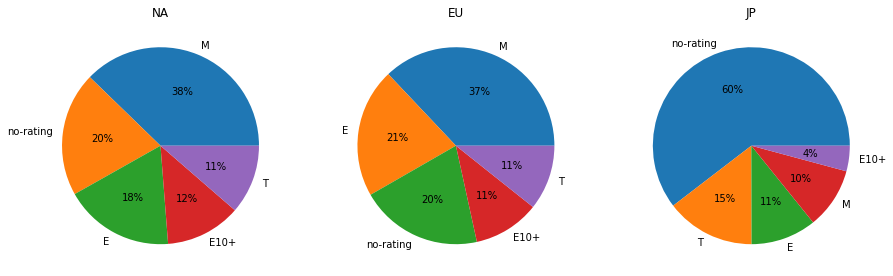

In [82]:

countries = ['na_sales','eu_sales','jp_sales']

fig, axs = plt.subplots(1, 3, figsize=(15, 7))

for i in range(len(countries)):
    df_res = (data_year.groupby('rating')[countries[i]].sum().
              reset_index().
              sort_values(countries[i], ascending = False, ignore_index = True))

    axs[i].pie(df_res[countries[i]], labels = df_res['rating'], autopct='%.0f%%')
    axs[i].set_title(countries[i].split('_')[0].upper())

Рейтинг ESRB влияет на продажи в каждом регионе по разному 
В Европе и Северной Америке наиболее популярные продажи с рейтингом М(для взрослых)    
В Европе и Северной Америке наименьшие продажи с рейтингом T(подросткам)   
В Японии популярные продажи без рейтинга
В Японии наименьшие продажи с рейтингом E10+(для всех от 10 лет)   

**Вывод по разделу 3**. 
- Топ-5 игровых платформ в регионе - Европа: PS4,PS3,XOne, X360,3DS  
- Топ-5 игровых платформ в регионе - Япония: 3DS,PS3,PSV,PS4,wIIu  
- Топ-5 игровых платформ в регионе - Северная Америка:PS4,XOne, X360,PS3,3DS 
- Европа и Северная Америка выбирают одинаковые платформы и на их долю приходится основная часть продаж-85: (40% и 45 %). Япония выбирает немного другие  платформы  и на них приходится 15% всех продаж   
- Топ-5 игровых жанров в регионе - Европа:Action, Shooter, Sports,Role-Playing,Racing
- Топ-5 игровых жанров в регионе - Япония: Role-Playing, Action, Misc,Fighting,Shooter 
- Топ-5 игровых жанров в регионе - Северная Америка:Action, Shooter, Sports,Role-Playing,Misc 
- В Европе и Северной Америке схожи вкусы на игровые жанры, они любители активных игр и более командных игр  
- В Японии преобладают более спокойные,тщательные игры, где на первую роль выходит интелектуальные способности игкрока.    
- Рейтинг ESRB влияет на продажи в каждом регионе по разному:  
    √ В Европе и Северной Америке наиболее популярные продажи с рейтингом М(для взрослых)      
    √ В Европе и Северной Америке наименьшие продажи с рейтингом T(подросткам)      
    √ В Японии популярные продажи без рейтинга  
    √ В Японии наименьшие продажи с рейтингом E10+(для всех от 10 лет)   


**4.Проверка гипотез**  
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные  

Нулевая гипотеза: рейтинг платформы Xbox One равен рейтингу платформы PC  
Альтернативная гипотеза: рейтинг платформы Xbox One НЕ равен рейтинга платформы PC 

In [75]:
data_year_1 = data_year[data_year['user_score'].notnull()]
data_year_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1300 non-null   object 
 1   platform         1300 non-null   object 
 2   year_of_release  1300 non-null   int64  
 3   genre            1300 non-null   object 
 4   na_sales         1300 non-null   float64
 5   eu_sales         1300 non-null   float64
 6   jp_sales         1300 non-null   float64
 7   other_sales      1300 non-null   float64
 8   critic_score     988 non-null    float64
 9   user_score       1300 non-null   float64
 10  rating           1300 non-null   object 
 11  total_sales      1300 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 132.0+ KB


In [76]:
data_xbox_one = data_year_1.query('platform == "XOne"')
data_pc = data_year_1.query('platform == "PC"')

In [77]:
alpha_1 = 0.01
result_1 = st.ttest_ind(data_xbox_one['user_score'],data_pc['user_score'],equal_var=False)
print('p-значение = ', result_1.pvalue)
if result_1.pvalue < alpha_1:
    print('отвергаем нулевую гипотезу')
else:
    print('принимаем нулевую гипотезу')

p-значение =  0.7263951389486794
принимаем нулевую гипотезу



Нулевая  гипотеза была принята за равенство двух совокупностей. Так как у нас двусторонняя гипотеза,то у нас альтернативная гипотеза формлуируется как неравенство двух ГС.
При проверке двусторосторонней гипотезы был выбран двухвыборочный t-тест для независимых выборок. 
в коде по умолчанию применили 'two-sided' и также применили equal_var=False так как размер выборок разный.

Так как наблюдаемое значение оказалось близким  предполагаемого в нулевой гипотезе => нулевая гипотеза принимается статистичиски значимыми данными, и можно сделать вывод что средний рейтинг пользователей платформы xbox_one и рейтинг пользователей платформы PC  одинаковые

Нулевая гипотеза: пользовательский рейтинг жанров Action  равен рейтингу жанра Sports  
Альтернативная гипотеза: пользовательский рейтинг жанров Action НЕ равен рейтингу жанра Sports 

In [78]:
data_action = data_year_1.query('genre == "Action"')
data_sports = data_year_1.query('genre == "Sports"')

In [79]:
alpha_2 = 0.01
result_2 = st.ttest_ind(data_action['user_score'],data_sports['user_score'],equal_var=False)
print('p-значение = ', result_2.pvalue)
if result_2.pvalue < alpha_2:
    print('отвергаем нулевую гипотезу')
else:
    print('принимаем нулевую гипотезу')

p-значение =  3.947118399375673e-10
отвергаем нулевую гипотезу



Нулевая  гипотеза была принята за равенство двух совокупностей. Так как у нас двусторонняя гипотеза,то у нас альтернативная гипотеза формлуируется как неравенство двух ГС.
При проверке двусторосторонней гипотезы был выбран двухвыборочный t-тест для независимых выборок. 
в коде по умолчанию применили 'two-sided' и также применили equal_var=False так как размер выборок разный.

Так как наблюдаемое значение оказалось далеко от предполагаемого в нулевой гипотезе => нулевая гипотеза в полной степени отвергается статистичиски значимыми данными, и можно сделать вывод что средний рейтинг жанров Action и  рейтинг жанра Sports РАЗНЫЙ

**5.Общий вывод:** 

1.Данные:   
- Датафрейм магазина "Стримчик" 16715 строк и 11 колонок(name, platform, year_of_release,critic_score,user_score,rating,genre,eu_sales,jp_sales,na_sales,other_sales)
- В столбце name два пропущенных значения. Были удалены две строки.   
- В столбце year_of_release 269 пропущенных значений. Были заменены медианным значением     
- В столбце rating 6766 пропущенных значений. Выделили их в отдельную группу no-rating 
- Поменяли типы данных у стобцов: year_of_release,user_score. 

2.Анализ данных:  
- В 1994 году наблюдается резкий скачок выпуска игр(напомним,что ERSB начала свою деятельность в 1994 году). С 2007-2011 гг. выпускалось наибольшее количество игр
- Наиболее популярные платформы это: PS2,X360,PS3,Wii,Wiiu и Ds  
- У платформ наблюдается одинаковая динамика в начале идет рост и затем падение(после 5 лет работы), в среднем платформы работают 10 лет  
- За последние 5 лет наиболее стабильные и набирающие обороты платформы: PS3,X360,PS4,3DS и XOne  
- Платформы PS3, 3DS,X360 падают по продажам, при этом являются  лидерами по продажам. Они НЕ  являются перспективными и на них не стоит делать ставки по продвижению.Стоит обратить внимание на платформы XOne и PS4 они уже в топе по продажам и при этом только набирают рост   
- Зависимость между отзывами критиков и продажами слабая.
- Зависимость между отзывами пользователей и продажами отстуствует.
- Более сильная связь у продаж с отзовами критиков.   
- Самый популярный жанр игр это 'Action', а самый непопулярный 'Puzzle'. Наимболие прибыльный жанр игр 'Shooter' и 'Sports', а наименьший 'Adventure'. Определена зависимость между высококимм продажами и высоким количеством игр в жанре 

3. Портрет пользователя каждого региона(для магазина):  
- Топ-5 игровых платформ в регионе - Европа: PS4,PS3,XOne, X360,3DS  
- Топ-5 игровых платформ в регионе - Япония: 3DS,PS3,PSV,PS4,wIIu  
- Топ-5 игровых платформ в регионе - Северная Америка:PS4,XOne, X360,PS3,3DS 
- Европа и Северная Америка выбирают одинаковые платформы и на их долю приходится основная часть продаж-85: (40% и 45 %). Япония выбирает немного другие  платформы  и на них приходится 15% всех продаж   
- Топ-5 игровых жанров в регионе - Европа:Action, Shooter, Sports,Role-Playing,Racing
- Топ-5 игровых жанров в регионе - Япония: Role-Playing, Action, Misc,Fighting,Shooter 
- Топ-5 игровых жанров в регионе - Северная Америка:Action, Shooter, Sports,Role-Playing,Misc 
- В Европе и Северной Америке схожи вкусы на игровые жанры, они любители активных игр и более командных игр  
- В Японии преобладают более спокойные,тщательные игры, где на первую роль выходит интелектуальные способности игрока.    
- Рейтинг ESRB влияет на продажи в каждом регионе по разному:  
    √ В Европе и Северной Америке наиболее популярные продажи с рейтингом М(для взрослых)      
    √ В Европе и Северной Америке наименьшие продажи с рейтингом T(подросткам)      
    √ В Японии популярные продажи без рейтинга  
    √ В Японии наименьшие продажи с рейтингом E10+(для всех от 10 лет)   

4. Выводы по гипотезам:
- Cредний рейтинг пользователей платформы xbox_one и рейтинг пользователей платформы PC одинаковый  
- Cредний рейтинг жанров игр Action и  рейтинг Sports разный 

5. Рекомендации магазину "Стримчик":   
- Рекомендуется обращать внимание на  игры с платформы:XOne и PS4  
- Рекомендуется обращать внимание на игры из жанра: Shooter,Action и Role-Playing  
- Рекомендуется обращать внимание на игры с рейтингом ESRB - 'M'  
- Рекомендуется обращать внимание на игры с пользовательским рейтингом более 5.
